In [1]:
import os
from glob import glob
import warnings

import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs

import sa_utils as sau
import plotting_utils as pu

from utils import roar_code_path as project_code_path
from utils import roar_data_path as project_data_path
from utils import trend_metric_ids as metric_ids

In [2]:
# Set fonts
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_dirs = ["/storage/home/dcl5300/fonts"]

font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["axes.linewidth"] = 1.5

## Analysis

In [3]:
# Calculate all and store
grids = ["LOCA2", "GARD-LENS"]
regrid_method = "nearest"
col_name = "slope"
proj_slice = "2015-2100"
hist_slice = None
fit_method = None
stationary = None

# Loop through metrics
for metric_id in metric_ids:
    # Do for each grid
    for grid in grids:
        # Check if done
        save_file = f"{metric_id}_{proj_slice}_{hist_slice}_{col_name}_{grid}grid_{regrid_method}.nc"
        if os.path.exists(f"{project_data_path}/results/{save_file}"):
            print(f"Already done: {save_file}")
            continue
            
        # Calculate
        with warnings.catch_warnings():
            uc = sau.uc_all(metric_id=metric_id,
                            grid=grid,
                            fit_method=fit_method,
                            stationary=stationary,
                            regrid_method=regrid_method,
                            proj_slice=proj_slice,
                            hist_slice=hist_slice,
                            col_name=col_name,
                            analysis_type="trends")
        # Store
        uc.to_netcdf(f"{project_data_path}/results/{save_file}")
        print(f"Done: {save_file}")
        del uc # memory management

/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/.venv/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


Done: avg_tas_2015-2100_None_slope_LOCA2grid_nearest.nc


/storage/work/dcl5300/current_projects/conus_comparison_lafferty-etal-2024/.venv/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


Done: avg_tas_2015-2100_None_slope_GARD-LENSgrid_nearest.nc
Done: sum_pr_2015-2100_None_slope_LOCA2grid_nearest.nc
Done: sum_pr_2015-2100_None_slope_GARD-LENSgrid_nearest.nc
Done: sum_hdd_2015-2100_None_slope_LOCA2grid_nearest.nc
Done: sum_hdd_2015-2100_None_slope_GARD-LENSgrid_nearest.nc
Done: sum_cdd_2015-2100_None_slope_LOCA2grid_nearest.nc
Done: sum_cdd_2015-2100_None_slope_GARD-LENSgrid_nearest.nc


## Plots

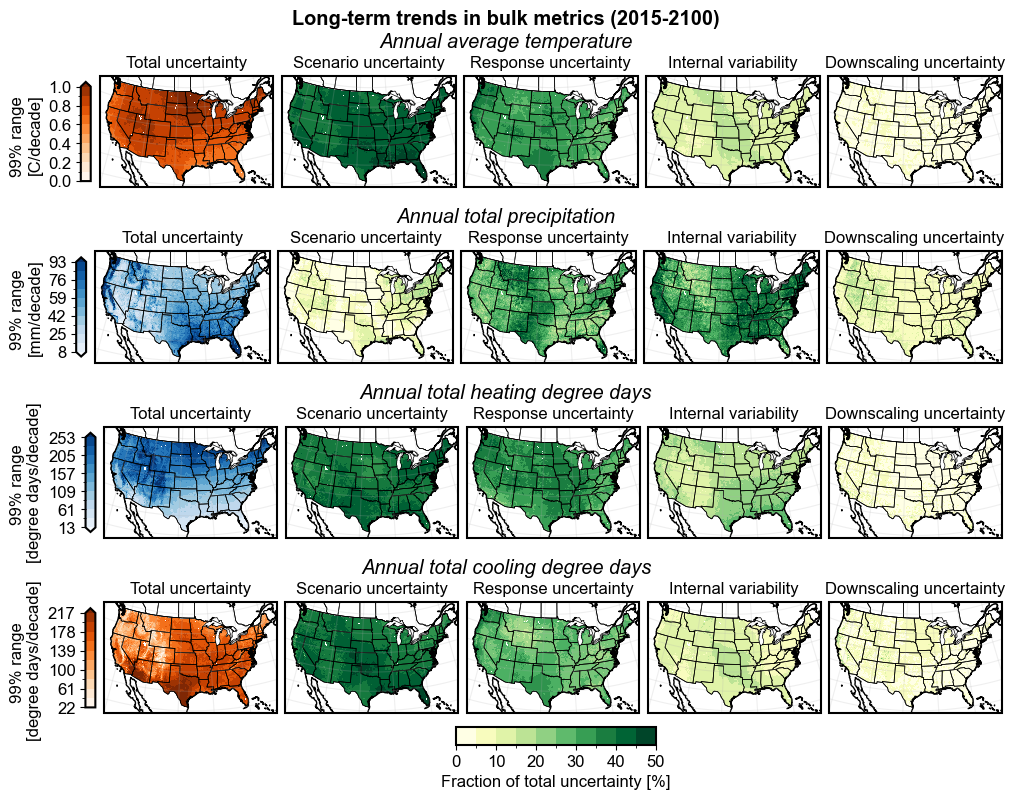

In [4]:
# Main plot
proj_slice = '2015-2100'
return_period = None
grid = 'LOCA2'
norm = 'uc_99w'

fig = plt.figure(figsize=(10, 7), layout='constrained')
subfigs = fig.subfigures(4, 1, hspace=0.01)

fig.suptitle("Long-term trends in bulk metrics (2015-2100)", fontweight="bold", y=1.05)

# Loop through metrics
for idp, metric_id in enumerate(metric_ids):
    axs = subfigs[idp].subplots(1, 5, subplot_kw=dict(projection=ccrs.LambertConformal()))
    p = pu.plot_uc_map(
        metric_id=metric_id,
        proj_slice=proj_slice,
        hist_slice=None,
        plot_col="slope",
        return_period=None,
        grid=grid,
        fit_method=None,
        stationary=None,
        norm=norm,
        analysis_type="trend",
        vmax_uc = 50,
        fig=subfigs[idp],
        axs=axs,
        y_title=1.07
    )

# Create a new axes for the colorbar at the bottom
cbar_ax = fig.add_axes([0.45, 0.0, 0.2, 0.025])  # [left, bottom, width, height]

# Add colorbar using the stored mappable
cbar = fig.colorbar(p, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Fraction of total uncertainty [%]')
    
plt.savefig('../figs/main/figure3.png', dpi=300, bbox_inches='tight')

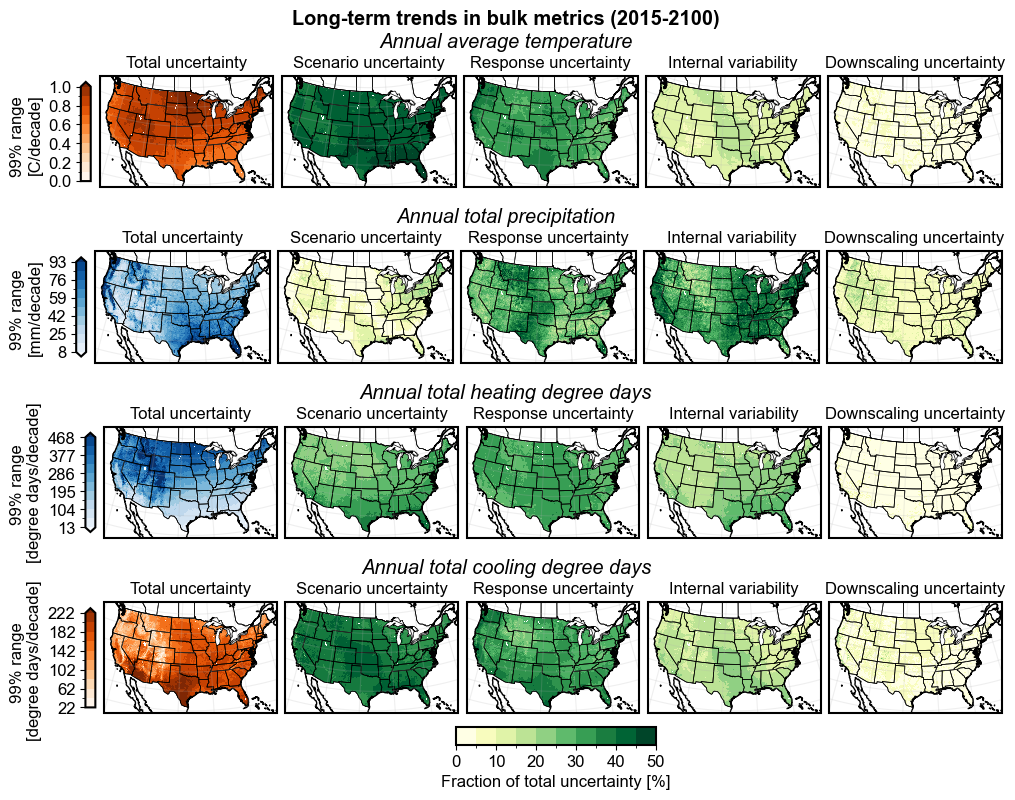

In [14]:
# Main plot
proj_slice = '2015-2100'
return_period = None
grid = 'LOCA2'
norm = 'uc_99w'

fig = plt.figure(figsize=(10, 7), layout='constrained')
subfigs = fig.subfigures(4, 1, hspace=0.01)

fig.suptitle("Long-term trends in bulk metrics (2015-2100)", fontweight="bold", y=1.05)

# Loop through metrics
for idp, metric_id in enumerate(metric_ids):
    axs = subfigs[idp].subplots(1, 5, subplot_kw=dict(projection=ccrs.LambertConformal()))
    p = pu.plot_uc_map(
        metric_id=metric_id,
        proj_slice=proj_slice,
        hist_slice=None,
        plot_col="slope",
        return_period=None,
        grid=grid,
        fit_method=None,
        stationary=None,
        norm=norm,
        analysis_type="trend",
        vmax_uc = 50,
        fig=subfigs[idp],
        axs=axs,
        y_title=1.07
    )

# Create a new axes for the colorbar at the bottom
cbar_ax = fig.add_axes([0.45, 0.0, 0.2, 0.025])  # [left, bottom, width, height]

# Add colorbar using the stored mappable
cbar = fig.colorbar(p, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Fraction of total uncertainty [%]')
    
plt.savefig('../figs/main/figure3.png', dpi=300, bbox_inches='tight')